In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Loading the Dataset

In [5]:
diabetesDF = pd.DataFrame(pd.read_csv('Weights/diabetes2.csv'))

In [6]:
print(diabetesDF.shape)
diabetesDF.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Preprocessing the Dataset

## Getting basic information about the dataset

In [7]:
diabetesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
diabetesDF.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Dividing the dataset in Train, Validation and Test sets

In [9]:
trainData, validationData, testData = np.split(diabetesDF.sample(frac=1).reset_index(drop=True), [int(.7*len(diabetesDF)), int(.9*len(diabetesDF))])

In [10]:
trainData.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,3,78,50,32,88,31.0,0.248,26,1
1,3,132,80,0,0,34.4,0.402,44,1
2,1,121,78,39,74,39.0,0.261,28,0
3,8,181,68,36,495,30.1,0.615,60,1
4,9,130,70,0,0,34.2,0.652,45,1


In [11]:
print(trainData.shape, validationData.shape, testData.shape)

(537, 9) (154, 9) (77, 9)


In [12]:
trainData = trainData.values.astype(np.float128)
validationData = validationData.values.astype(np.float128)
testData = testData.values.astype(np.float128)


In [13]:
X_train = trainData[:, :8]
y_train = trainData[:,8]
X_validation = validationData[:, :8]
y_validation = validationData[:,8]
X_test = testData[:, :8]
y_test = testData[:,8]


In [14]:
print(X_train.shape, y_train.shape, X_validation.shape, y_validation.shape, X_test.shape, y_test.shape)

(537, 8) (537,) (154, 8) (154,) (77, 8) (77,)


## Normalize the data(each feature should have mean 0 and standard deviation 1)

In [15]:
X_mean = np.mean(X_train, axis=0)
X_std = np.std(X_train, axis=0)

In [16]:
X_train = (X_train - X_mean)/X_std
X_validation = (X_validation - X_mean)/X_std
X_test = (X_test - X_mean)/X_std

In [17]:
# adding a column of 1's in the start of the training and test datas to denote X0
trainOnes = np.ones((trainData.shape[0], 1))
validationOnes = np.ones((validationData.shape[0], 1))
testOnes = np.ones((testData.shape[0], 1))
print(trainOnes.shape, validationOnes.shape, testOnes.shape)
X_train = np.hstack((trainOnes, X_train))
X_validation = np.hstack((validationOnes, X_validation))
X_test = np.hstack((testOnes, X_test))
print(X_train.shape, X_validation.shape ,X_test.shape)


(537, 1) (154, 1) (77, 1)
(537, 9) (154, 9) (77, 9)


In [18]:
print(np.mean(X_train, axis=0))
print(np.std(X_train, axis=0))

[ 1.00000000e+00  6.46079507e-21 -7.59143421e-20 -1.32446299e-19
  2.90735778e-20  3.23039753e-21 -6.82421479e-20  3.06887766e-20
  9.36815285e-20]
[0. 1. 1. 1. 1. 1. 1. 1. 1.]


# Logistic Regression

## Necessary Functions

In [19]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

In [20]:
def hypothesis(X, theta):
    return sigmoid(np.dot(X, theta))

In [21]:
def error(X, y, theta):
    hypo = hypothesis(X, theta)
    return -1*np.mean((y*np.log(hypo)) + ((1-y)*np.log(1-hypo)))

In [22]:
def gradient(X, y, theta):
    m = X.shape[0]
    hypo = hypothesis(X, theta)
    grad = -np.dot(X.T, (y - hypo)) 
    return grad/m   

## Logistic Regression with Batch Gradient Descent(BGD)

In [23]:
def batchGradientDescent(X_train, y_train, X_validation, y_validation, learningRate=0.01, maxEpochs=1000):
    m, n = X_train.shape
    theta = np.zeros((n,))
    trainErrorList = []
    validationErrorList = []
    for i in tqdm(range(maxEpochs)):
        trainErr = error(X_train, y_train, theta)
        trainErrorList.append(trainErr)
        validationErr = error(X_validation, y_validation, theta)
        validationErrorList.append(validationErr)
        grad = gradient(X_train, y_train, theta)
        theta = theta - learningRate * grad
    return theta, trainErrorList, validationErrorList


In [24]:
mainTheta, trainErrorList, validationErrorList = batchGradientDescent(X_train, y_train, X_validation, y_validation, 0.01, 1500)

100%|██████████| 1500/1500 [00:00<00:00, 3440.54it/s]


In [25]:
mainTheta

array([-0.67100222,  0.26564408,  0.9221217 , -0.15348762, -0.04146355,
       -0.01032811,  0.58964326,  0.22075438,  0.28934821], dtype=float128)

## Loss Plots

In [26]:
def drawBGDPlots(learningRate=0.01, maxEpochs=1000):
    theta, trainErrorList, validationErrorList = batchGradientDescent(
        X_train, y_train, X_validation, y_validation, learningRate, 1000)
    plt.plot(trainErrorList, label='Training Error', color='blue')
    plt.plot(validationErrorList, label='Validation Error', color='red')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


100%|██████████| 1000/1000 [00:00<00:00, 1923.49it/s]


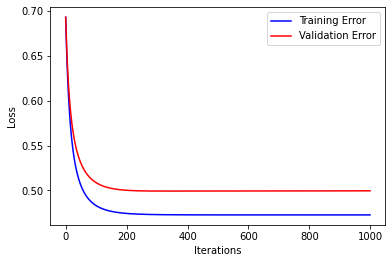

In [27]:
drawBGDPlots(0.1)

100%|██████████| 1000/1000 [00:00<00:00, 2373.35it/s]


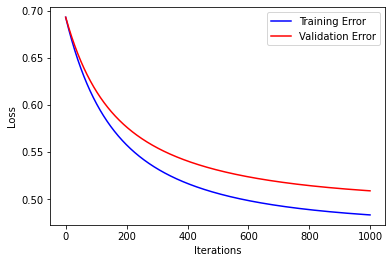

In [28]:
drawBGDPlots(0.01)


100%|██████████| 1000/1000 [00:00<00:00, 2671.62it/s]


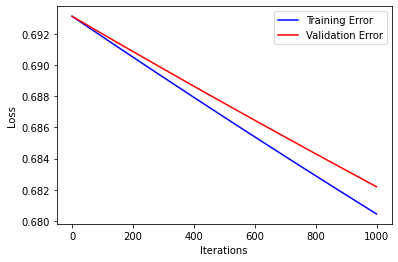

In [29]:
drawBGDPlots(0.0001)


100%|██████████| 1000/1000 [00:00<00:00, 2184.75it/s]


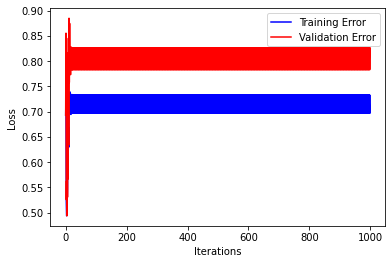

In [30]:
drawBGDPlots(10)

In [31]:
def getPredictionList(X, theta):
    hypo = hypothesis(X, theta)
    output = np.zeros((X.shape[0],))
    output[hypo >= 0.5] = 1
    output = output.astype('int')
    return output

In [32]:
def getConfusionMatrix(X, y, theta):
    y_ = getPredictionList(X, theta)
    confusionMatrix = np.zeros((2, 2))
    for i in tqdm(range(y.shape[0])):
        confusionMatrix[int(y[i]), int(y_[i])] += 1
    accuracy = (confusionMatrix[0, 0] + confusionMatrix[1, 1]) / np.sum(confusionMatrix)
    precision = (confusionMatrix[0, 0]) / confusionMatrix[:, 0].sum()
    recall = (confusionMatrix[0, 0]) / confusionMatrix[0, :].sum()
    f1 = 2 * precision * recall / (precision + recall)
    print(confusionMatrix)
    print('Accuracy: ' + str(accuracy))
    print('Precision: ' + str(precision))
    print('Recall: ' + str(recall))
    print('F1: ' + str(f1))

In [33]:
getConfusionMatrix(X_test, y_test, mainTheta)

100%|██████████| 77/77 [00:00<00:00, 19789.30it/s]

[[42.  5.]
 [11. 19.]]
Accuracy: 0.7922077922077922
Precision: 0.7924528301886793
Recall: 0.8936170212765957
F1: 0.8400000000000001


## Logistic Regression with Stochastic Gradient Descent(SGD)

In [35]:
def stochasticGradientDescent(X_train, y_train, X_validation, y_validation, learningRate=0.01, maxEpochs=1000):
    m, n = X_train.shape
    theta = np.zeros((n,))
    trainErrorList = []
    validationErrorList = []
    for i in tqdm(range(maxEpochs)):
        trainErr = error(X_train, y_train, theta)
        trainErrorList.append(trainErr)
        validationErr = error(X_validation, y_validation, theta)
        validationErrorList.append(validationErr)
        for j in range(m):
            # microErr = error(X_train[j, :], y_train[j], theta)
            microGrad = gradient(X_train[j, :], y_train[j], theta)
            theta = theta - learningRate * microGrad
    return theta, trainErrorList, validationErrorList


In [48]:
mainTheta, trainErrorList, validationErrorList = stochasticGradientDescent(
    X_train, y_train, X_validation, y_validation, 0.01, 1500)

100%|██████████| 1500/1500 [00:16<00:00, 89.19it/s]


In [49]:
mainTheta

array([-0.79109207,  0.2971108 ,  1.12592152, -0.24349447, -0.03120358,
       -0.13166136,  0.72566068,  0.24758979,  0.28921356], dtype=float128)

In [50]:
def drawSGDPlots(learningRate=0.01, maxEpochs=1000):
    theta, trainErrorList, validationErrorList = stochasticGradientDescent(
        X_train, y_train, X_validation, y_validation, learningRate, 1000)
    plt.plot(trainErrorList, label='Training Error', color='blue')
    plt.plot(validationErrorList, label='Validation Error', color='red')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

100%|██████████| 1000/1000 [00:16<00:00, 62.14it/s]


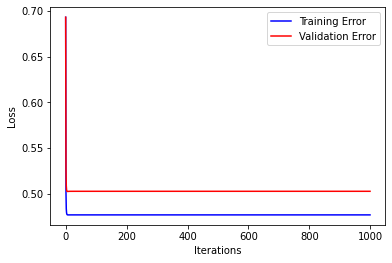

In [51]:
drawSGDPlots(0.1)

100%|██████████| 1000/1000 [00:17<00:00, 57.28it/s]


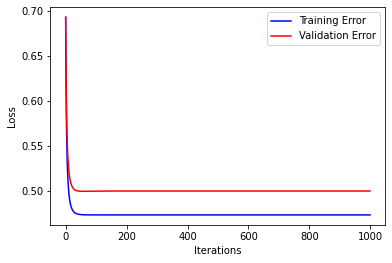

In [52]:
drawSGDPlots(0.01)

100%|██████████| 1000/1000 [00:19<00:00, 51.43it/s]


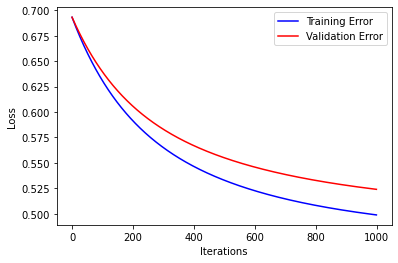

In [53]:
drawSGDPlots(0.0001)

100%|██████████| 1000/1000 [00:17<00:00, 58.41it/s]


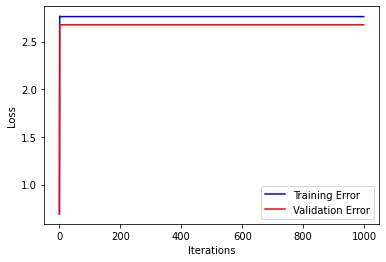

In [47]:
drawSGDPlots(10)

In [54]:
getConfusionMatrix(X_test, y_test, mainTheta)

100%|██████████| 77/77 [00:00<00:00, 89836.27it/s]

[[42.  5.]
 [12. 18.]]
Accuracy: 0.7792207792207793
Precision: 0.7777777777777778
Recall: 0.8936170212765957
F1: 0.8316831683168316


# Sklearn's Implementation of Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve

In [56]:
sklearnModel = LogisticRegression()

LogisticRegression()

In [63]:
trainSize, trainScores, testScores = learning_curve(LogisticRegression(), X_train, y_train)

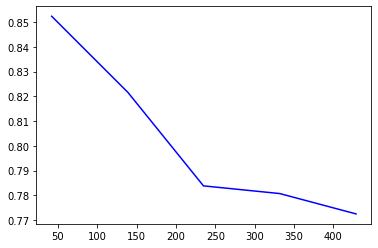

In [66]:
plt.plot(trainSize, np.mean(trainScores, axis=1), label='Training Error', color='blue')
plt.show()